In [2]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
!pip install ta
from ta.volatility import AverageTrueRange
from ta.volume import VolumeWeightedAveragePrice

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=e7c49843d2fbacafe5bf4a4996a09e7b6707f91f80dcccee97699523e7f8fedf
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [3]:
# Setting stocks and intervals
stocks = ["VOD.L", "MKS.L", "HSBA.L", "RR.L", "TSCO.L", "SHEL.L", "JMG.L"]
start_date = "2013-01-01"
end_date = "2023-12-31"

In [4]:
# Initialize an empty list to collect DataFrames
stock_data_list = []

# Loop through each stock, download the data, and add it to the list
for stock in stocks:
    data = yf.download(stock, start=start_date, end=end_date)
    data['Stock'] = stock
    stock_data_list.append(data)

# Concatenate all the DataFrames in the list into a single DataFrame
stock_data = pd.concat(stock_data_list)

# Display the resulting DataFrame
stock_data.head()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Stock
Date,,,,,,,
2013-01-02,163.537201,165.153198,161.034805,164.162704,69.963257,83340593,VOD.L
2013-01-03,164.631897,164.830002,162.598801,164.110596,69.941040,71870539,VOD.L
2013-01-04,163.693497,169.288300,163.693497,166.873596,71.118591,76183361,VOD.L
2013-01-07,166.456497,168.106995,166.352295,166.456497,70.940819,71771713,VOD.L
2013-01-08,170.053604,171.767700,169.323807,169.323807,72.162834,140972109,VOD.L


In [6]:
# Basic Statistics
stock_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,19442.000000,19442.000000,19442.000000,19442.000000,19442.000000,1.944200e+04
mean,529.253567,534.684200,523.422820,529.102665,403.549278,2.537022e+07
std,661.777728,667.979107,655.422603,661.700572,508.327480,3.509642e+07
min,39.121101,39.121101,3.045000,38.983898,38.983898,0.000000e+00
25%,139.000000,141.212498,136.800003,138.899994,109.059099,5.511859e+06
50%,271.066498,273.853210,268.153198,271.084656,226.484085,1.462523e+07
75%,514.749985,519.784973,508.850388,513.074982,366.422218,3.063912e+07
max,2784.500000,2801.000000,2757.500000,2772.500000,2682.701660,9.423232e+08


from matplotlib import pyplot as plt
_df_0['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Close', y='Adj Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
# checking missing values
stock_data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

**EXPLORATORY** **DATA** **ANALYSIS**

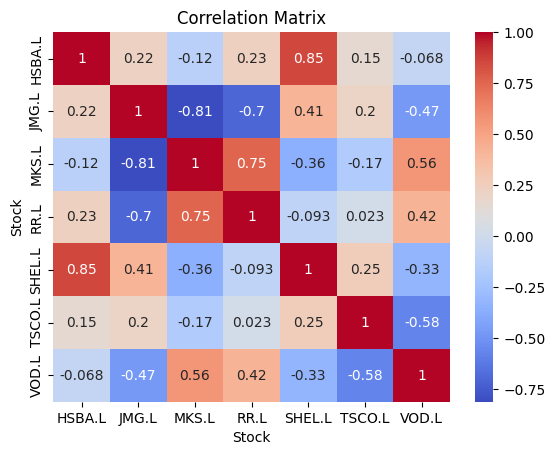

In [8]:
# Correlation Analysis
# Pivot the data to get a DataFrame with stocks as columns
pivot_data = stock_data.pivot_table(index='Date', columns='Stock', values='Adj Close')

# Calculate the correlation matrix
correlation_matrix = pivot_data.corr()

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

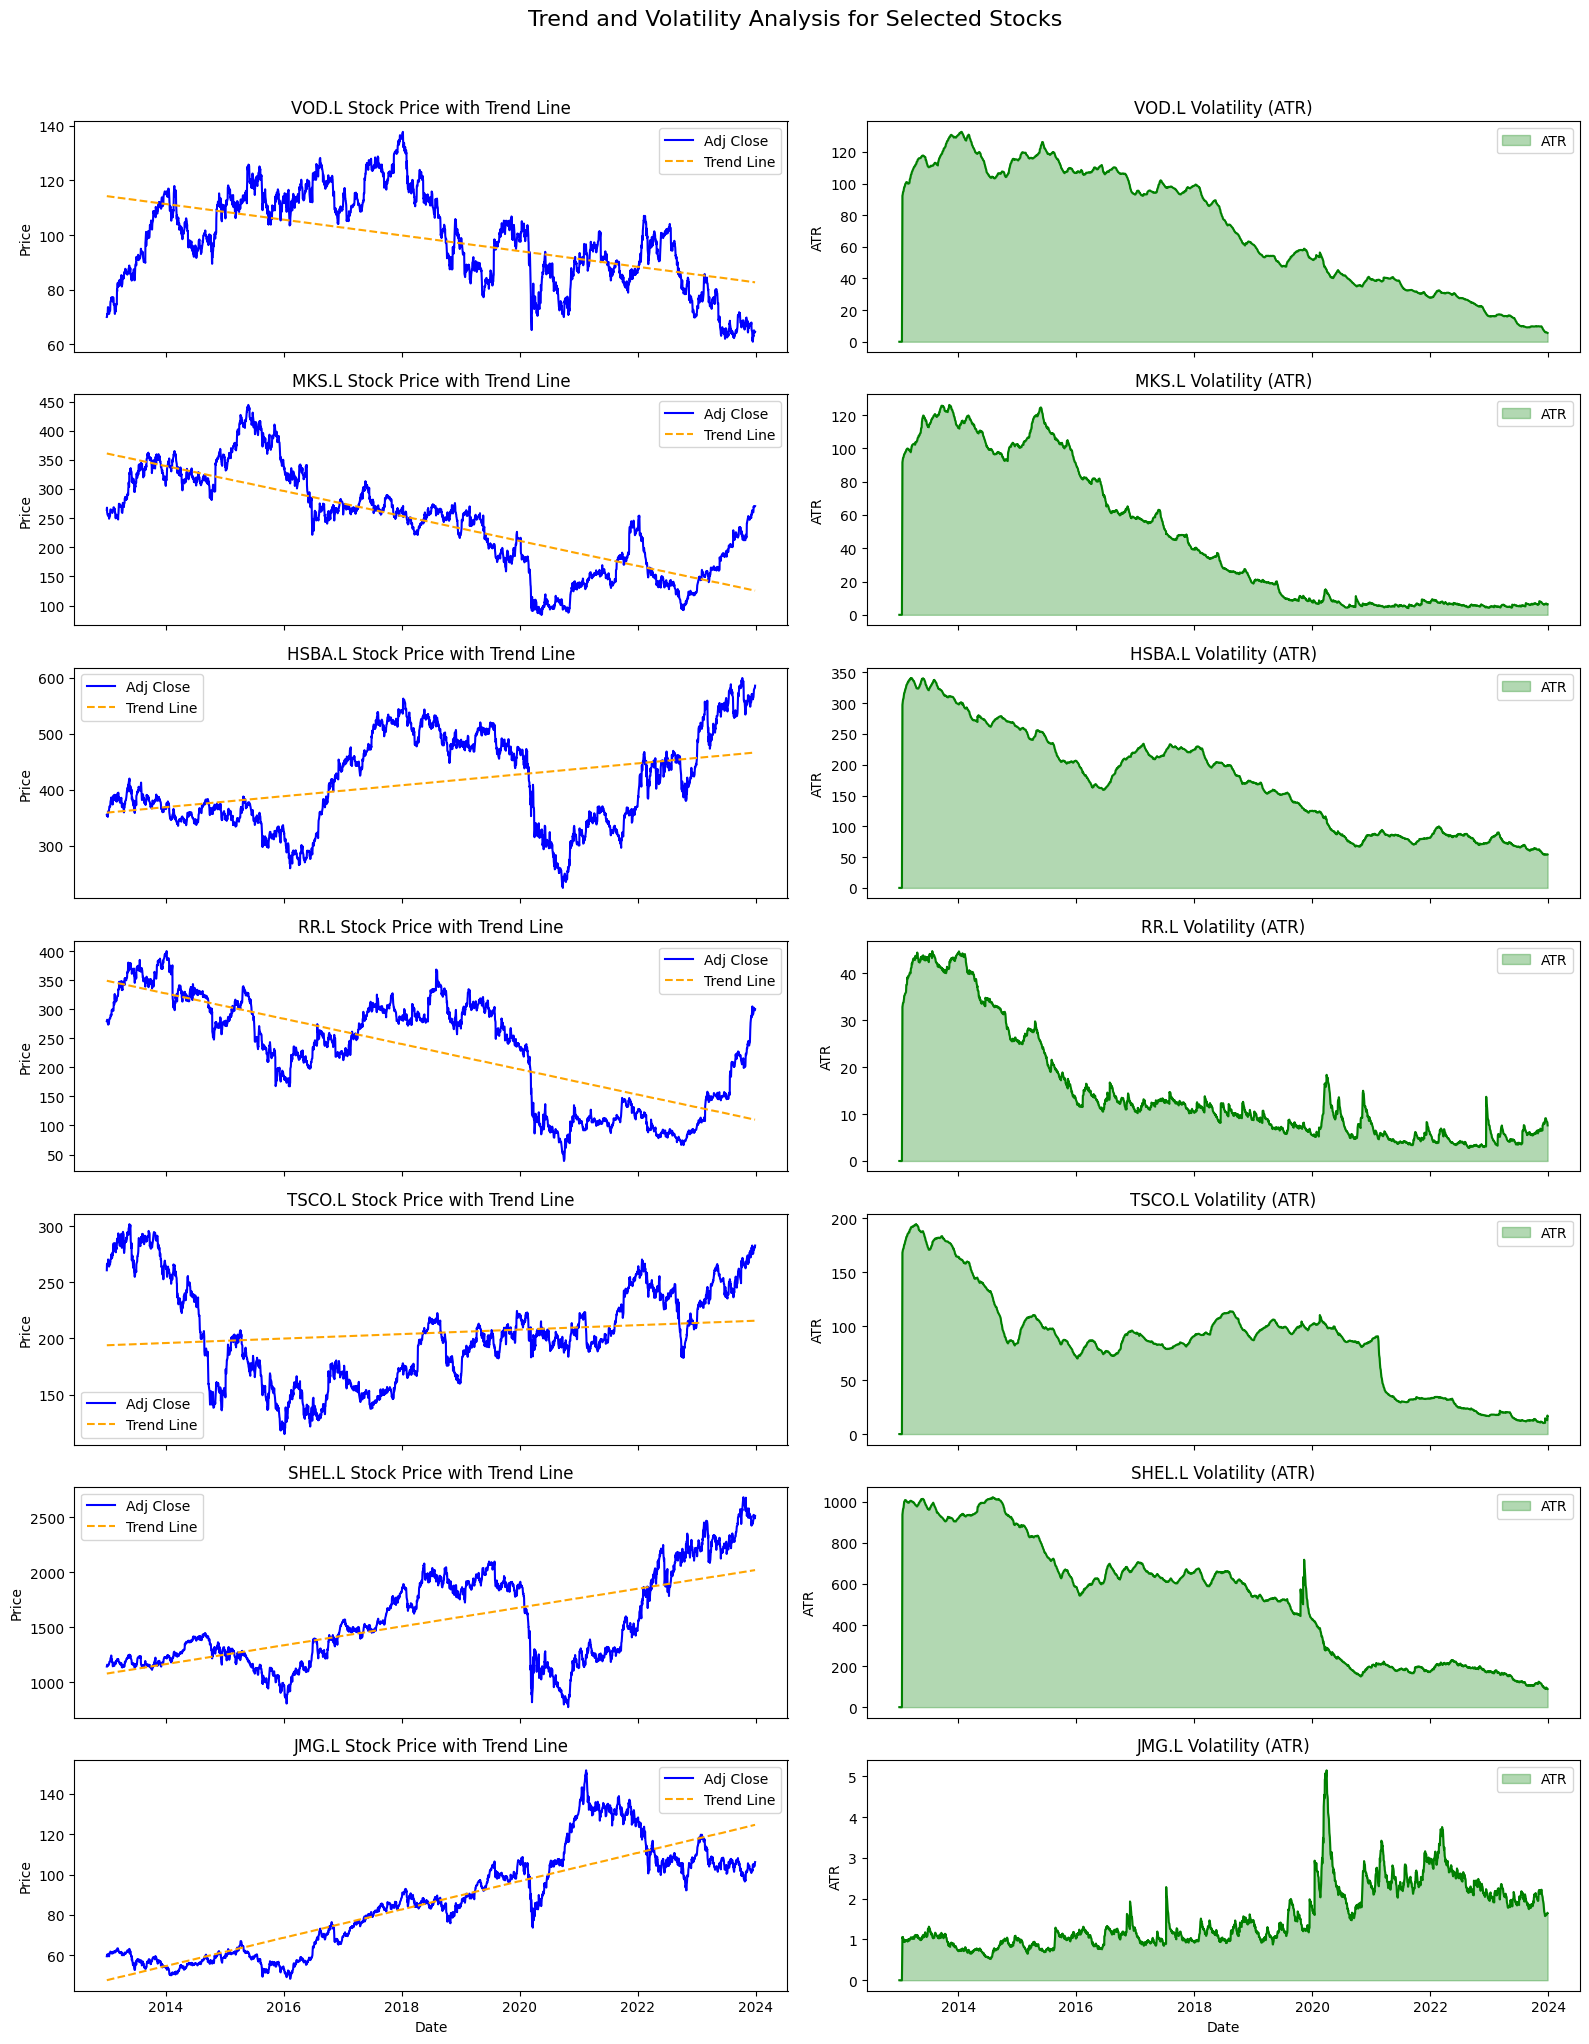

In [9]:
# Initialize subplots with proper figure size and spacing
fig, axs = plt.subplots(len(stocks), 2, figsize=(16, 20), sharex='col')

# Loop through each stock for analysis
for i, stock in enumerate(stocks):
    # Subset data for the current stock
    stock_data_subset = stock_data[stock_data['Stock'] == stock]
    dates = np.array(range(len(stock_data_subset)))

    # Trend analysis using linear regression
    close_prices = stock_data_subset['Adj Close']
    slope, intercept, r_value, p_value, std_err = linregress(dates, close_prices)
    trend_line = slope * dates + intercept

    # Plotting trend line
    axs[i, 0].plot(stock_data_subset.index, close_prices, label='Adj Close', color='blue')
    axs[i, 0].plot(stock_data_subset.index, trend_line, label='Trend Line', linestyle='--', color='orange')
    axs[i, 0].set_title(f'{stock} Stock Price with Trend Line')
    axs[i, 0].set_ylabel('Price')
    axs[i, 0].legend()

    # Volatility analysis using Average True Range (ATR)
    atr_indicator = AverageTrueRange(high=stock_data_subset['High'], low=stock_data_subset['Low'],
                                     close=stock_data_subset['Adj Close'], window=14)
    atr_values = atr_indicator.average_true_range()

    # Plotting ATR
    axs[i, 1].fill_between(stock_data_subset.index, 0, atr_values, label='ATR', color='green', alpha=0.3)
    axs[i, 1].plot(stock_data_subset.index, atr_values, linestyle='-', color='green')
    axs[i, 1].set_title(f'{stock} Volatility (ATR)')
    axs[i, 1].set_ylabel('ATR')
    axs[i, 1].legend()

# Set common X-axis label for the last row of subplots
for ax in axs[-1, :]:
    ax.set_xlabel('Date')

# Adjust layout, add overall title, and display
plt.suptitle('Trend and Volatility Analysis for Selected Stocks', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

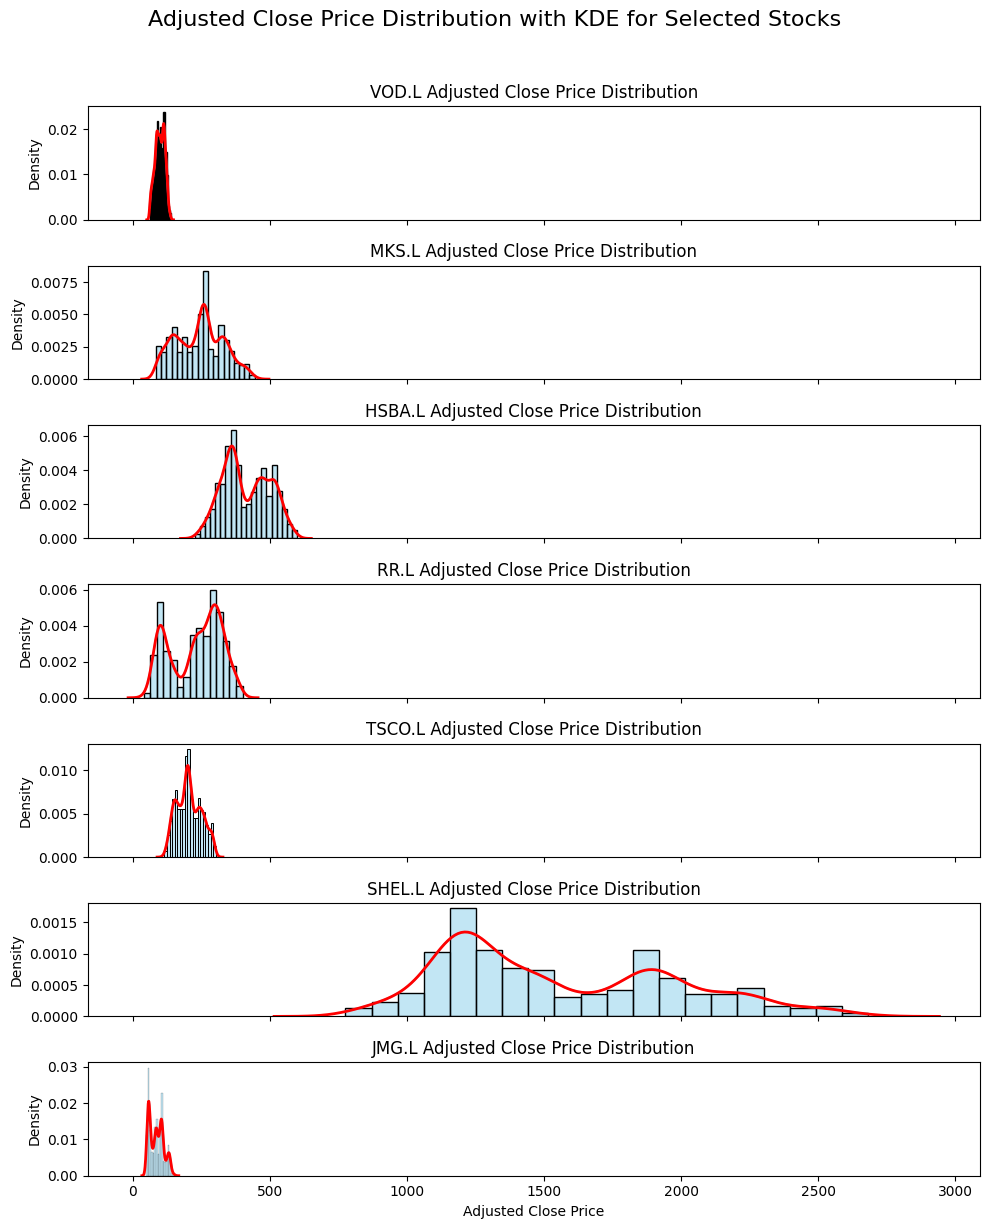

In [10]:
# Initialize subplots with proper figure size and spacing
fig, axs = plt.subplots(len(stocks), figsize=(10, 12), sharex='col')

# Loop through each stock for analysis
for i, stock in enumerate(stocks):
    # Subset data for the current stock
    stock_data_subset = stock_data[stock_data['Stock'] == stock]

    # Plot histogram with KDE
    sns.histplot(stock_data_subset['Adj Close'], kde=True, ax=axs[i], color='skyblue', stat='density')

    # Add distribution line (KDE)
    sns.kdeplot(stock_data_subset['Adj Close'], color='red', ax=axs[i], linewidth=2)

    # Set title and labels
    axs[i].set_title(f'{stock} Adjusted Close Price Distribution')
    axs[i].set_xlabel('Adjusted Close Price')
    axs[i].set_ylabel('Density')

# Set common X-axis label for the last row of subplots
for ax in axs[-1:]:
    ax.set_xlabel('Adjusted Close Price')

# Adjust layout, add overall title, and display
plt.suptitle('Adjusted Close Price Distribution with KDE for Selected Stocks', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()


In [13]:
from scipy.stats import skew, kurtosis
# Initialize lists to store skewness and kurtosis values
skewness_values = []
kurtosis_values = []

# Loop through each stock to calculate skewness and kurtosis
for stock in stocks:
    stock_data_subset = stock_data[stock_data['Stock'] == stock]['Adj Close']
    skewness = skew(stock_data_subset)
    kurt = kurtosis(stock_data_subset)
    skewness_values.append(skewness)
    kurtosis_values.append(kurt)
    print(f'Skewness for {stock}: {skewness}')
    print(f'Kurtosis for {stock}: {kurt}')

    # Create a DataFrame to display the skewness and kurtosis values
skew_kurt_df = pd.DataFrame({
    'Stock': stocks,
    'Skewness': skewness_values,
    'Kurtosis': kurtosis_values
})

print(skew_kurt_df)

Skewness for VOD.L: -0.13198744693603748
Kurtosis for VOD.L: -0.8117750119307168
Skewness for MKS.L: 0.04648222675744848
Kurtosis for MKS.L: -0.8171220269158552
Skewness for HSBA.L: 0.12546946650935678
Kurtosis for HSBA.L: -1.0420774822295489
Skewness for RR.L: -0.3198476119461811
Kurtosis for RR.L: -1.2103225630487644
Skewness for TSCO.L: 0.1909757600882863
Kurtosis for TSCO.L: -0.8141759056409503
Skewness for SHEL.L: 0.5308892569295537
Kurtosis for SHEL.L: -0.7516847717401935
Skewness for JMG.L: 0.325291232575843
Kurtosis for JMG.L: -0.9480501650380022
    Stock  Skewness  Kurtosis
0   VOD.L -0.131987 -0.811775
1   MKS.L  0.046482 -0.817122
2  HSBA.L  0.125469 -1.042077
3    RR.L -0.319848 -1.210323
4  TSCO.L  0.190976 -0.814176
5  SHEL.L  0.530889 -0.751685
6   JMG.L  0.325291 -0.948050


<ipython-input-14-aaa77ae94de3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stock', y='Skewness', data=skew_kurt_df, palette='viridis')


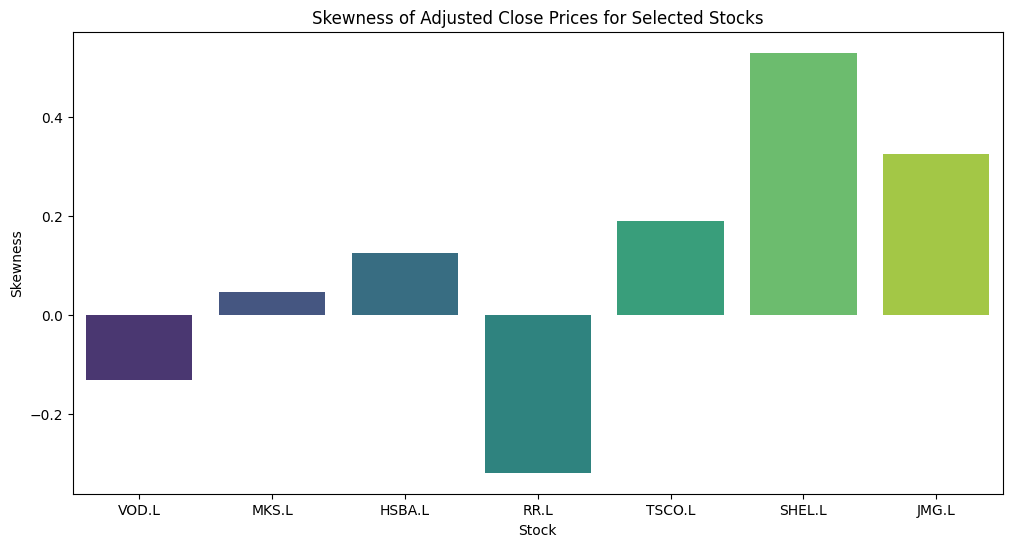

<ipython-input-14-aaa77ae94de3>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Stock', y='Kurtosis', data=skew_kurt_df, palette='magma')


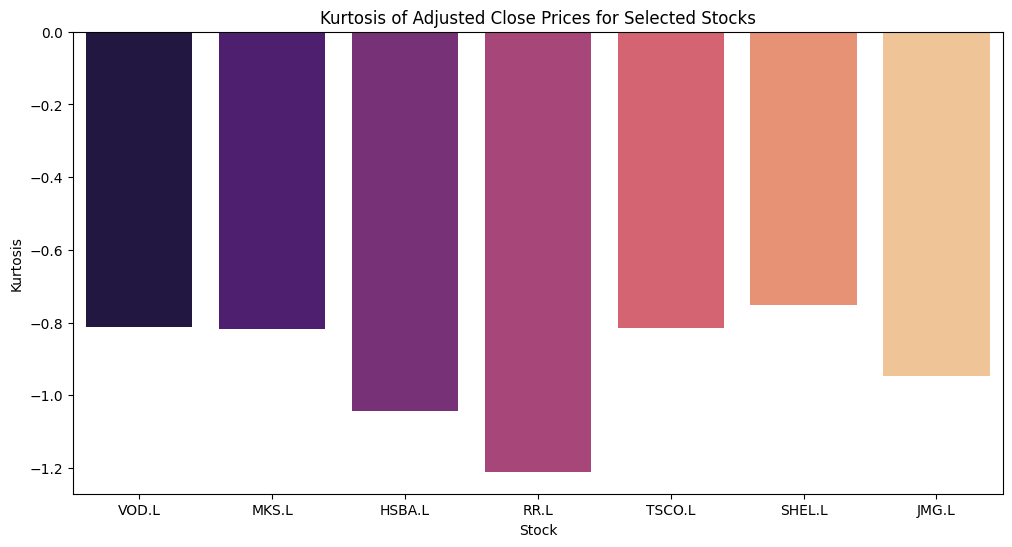

In [14]:
# Bar plot for Skewness
plt.figure(figsize=(12, 6))
sns.barplot(x='Stock', y='Skewness', data=skew_kurt_df, palette='viridis')
plt.title('Skewness of Adjusted Close Prices for Selected Stocks')
plt.xlabel('Stock')
plt.ylabel('Skewness')
plt.show()

# Bar plot for Kurtosis
plt.figure(figsize=(12, 6))
sns.barplot(x='Stock', y='Kurtosis', data=skew_kurt_df, palette='magma')
plt.title('Kurtosis of Adjusted Close Prices for Selected Stocks')
plt.xlabel('Stock')
plt.ylabel('Kurtosis')
plt.show()